## Importing Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Importing the dataset

In [110]:
df=pd.read_csv("OSHA HSE DATA_ALL ABSTRACTS 15-17_FINAL.csv")
df

,summary_nr,Event Date,Abstract Text,Event Description,Event Keywords,con_end,Construction End Use,build_stor,Building Stories,proj_cost,...,Event type,evn_factor,Environmental Factor,hum_factor,Human Factor,task_assigned,Task Assigned,hazsub,fat_cause,fall_ht
0,220982664,8/10/2017,"At 9:00 a.m. on August 10, 2017, an employee w...",EMPLOYEE'S FINGERS AMPUTATED WHILE OPERATING A...,"FINGER,MECHANICAL POWER PRESS,AMPUTATION,GUARD",0,,0,,0,...,Caught in or between,2,Catch Point/Puncture Action,14,Other,1,Regularly Assigned,0,0,0
1,220973937,7/17/2017,"At 9:45 a.m. on July 17, 2017, an employee was...",EMPLOYEE'S FINGER IS CAUGHT IN DRILL AND IS AM...,"CAUGHT IN,DRIVE SHAFT,RESIDENTIAL CONSTRUCTION...",H,Other building,1,1,0,...,Caught in or between,18,Other,10,Position Inappropriate For Task,1,Regularly Assigned,0,0,0
2,220967632,6/30/2017,"At 7:30 a.m. on June 30, 2017, an employee was...",EMPLOYEE IS HOSPITALIZED AFTER BEING INJURED I...,"AMPUTATED,EXPLOSION,FIREWORKS",0,,0,,0,...,Other,18,Other,4,Malfunction In Securing/Warning Op,2,Not Regularly Assigned,0,0,0
3,220969901,6/30/2017,"At 2:00 p.m. on June 30, 2017, an employee was...",EMPLOYEE FALLS FROM ROOF AND IS INJURED,"RIB,ROOF,HEAD,FALL PROTECTION,FALL,COLLARBONE,...",C,Commercial building,1,1,D,...,Fall (from elevation),13,Work-Surface/Facility-Layout Condition,14,Other,1,Regularly Assigned,0,15,0
4,220977748,6/23/2017,"At 12:20 p.m. on June 23, 2017, an employee wa...",EMPLOYEE IS STRUCK BY PLYWOOD WHILE UNLOADING ...,"STRUCK BY,TRUCK,BRAIN,NECK,FRACTURE,UNSTABLE LOAD",0,,0,,0,...,Struck-by,6,Overhead Moving/Falling Object Action,15,Insufficient/Lack/Housekeeping Program,1,Regularly Assigned,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4842,220778856,7/1/2015,"At approximately 9:15 a.m. on July 1, 2015, Em...","EMPLOYEE FALLS FROM BILLBOARD, SUSTAINS TRAUMA...","FALL,LOST BALANCE,LADDER",0,,0,,0,...,Fall (from elevation),18,Other,8,Perception Malfunction Task-Environment,1,Regularly Assigned,0,0,0
4843,220778096,7/1/2015,"At approximately 8:30 a.m. on July 1, 2015, Em...","EMPLOYEE FALLS FROM ELEVATION, SUSTAINS HEAD T...","FALL,LOST BALANCE,HEAD",0,,0,,0,...,Fall (from elevation),13,Work-Surface/Facility-Layout Condition,6,Equipment Inappropriate For Operation,2,Not Regularly Assigned,0,0,0
4844,220778112,7/1/2015,"At 3:00 p.m. on July 1, 2015, an employee was ...",EMPLOYEE FOUND UNRESPONSIVE BY HOME OWNER DURI...,UNCONSCIOUSNESS,0,,0,,0,...,Other,18,Other,14,Other,1,Regularly Assigned,0,0,0
4845,220777940,7/1/2015,"At approximately 2:30 p.m. on July 1, 2015, Em...",EMPLOYEE IS STRUCK AND KILLED BY LOGGING TRUCK...,"STRUCK BY,MOTOR VEHICLE",0,,0,,0,...,Struck-by,13,Work-Surface/Facility-Layout Condition,1,"Misjudgment, Hazardous Situation",1,Regularly Assigned,0,0,0


## Extracting time from abstract text

In [112]:
import re

time_pattern = r'(\d{1,2}:\d{2}\s*(?:[ap]\.?m\.?|AM|PM|a\.?m\.?|p\.?m\.?))'

# Extract the time using regex and create a new column "Time"
df['Time'] = df['Abstract Text'].str.extract(time_pattern)

# Display the DataFrame with the extracted time
print(df)



      summary_nr Event Date  \
0      220982664  8/10/2017   
1      220973937  7/17/2017   
2      220967632  6/30/2017   
3      220969901  6/30/2017   
4      220977748  6/23/2017   
...          ...        ...   
4842   220778856   7/1/2015   
4843   220778096   7/1/2015   
4844   220778112   7/1/2015   
4845   220777940   7/1/2015   
4846   220778195   7/1/2015   

                                          Abstract Text  \
0     At 9:00 a.m. on August 10, 2017, an employee w...   
1     At 9:45 a.m. on July 17, 2017, an employee was...   
2     At 7:30 a.m. on June 30, 2017, an employee was...   
3     At 2:00 p.m. on June 30, 2017, an employee was...   
4     At 12:20 p.m. on June 23, 2017, an employee wa...   
...                                                 ...   
4842  At approximately 9:15 a.m. on July 1, 2015, Em...   
4843  At approximately 8:30 a.m. on July 1, 2015, Em...   
4844  At 3:00 p.m. on July 1, 2015, an employee was ...   
4845  At approximately 2:30 p.m. on J

In [113]:
df["Event Keywords"].str.count('FINGER').sum()

523

In [114]:
df["Event Keywords"].str.count('LEG').sum()

249

In [115]:
df["Event Keywords"].str.count('BACK').sum()

212

In [116]:
df["Event Keywords"].str.count('NECK').sum()

102

In [117]:
keywords=['HEAD','FINGER','LEG','BACK','BRAIN','NECK','CARDIAC ARREST','HEART','AMPUTATED','UNCONSCIOUSNESS',
          'FAINTED','AMPUTATION','HEAT','ASPHYXIATED','NAIL','SKULL','TRAFFIC ACCIDENT',
          'RIB','ELECTROCUTED','COLLAPSE','TORSO','SHOULDER','FOOT','SLIPS','ELECTRIC SHOCK','CHEMICAL','ARM',
          'SLIP','ALLERGIC REACTION','HAND'
         ,'STRUCK BY','BURN','HIP','PINNED','SAW','DROWN','NON RESPONSIVE','TRAPPED','THUMB']
def add_keyword(text):
    for keyword in keywords:
        if keyword in text:
            return keyword
    return 'NA'
    
df["new"]=df["Event Description"].apply(add_keyword)

In [118]:
df["Time"]=pd.to_datetime(df["Time"]) 
df["Time"].info

 
df

/var/folders/2g/ngjdw0bx2xzff_6zbb624q740000gn/T/ipykernel_11369/551972712.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Time"]=pd.to_datetime(df["Time"])


,summary_nr,Event Date,Abstract Text,Event Description,Event Keywords,con_end,Construction End Use,build_stor,Building Stories,proj_cost,...,Environmental Factor,hum_factor,Human Factor,task_assigned,Task Assigned,hazsub,fat_cause,fall_ht,Time,new
0,220982664,8/10/2017,"At 9:00 a.m. on August 10, 2017, an employee w...",EMPLOYEE'S FINGERS AMPUTATED WHILE OPERATING A...,"FINGER,MECHANICAL POWER PRESS,AMPUTATION,GUARD",0,,0,,0,...,Catch Point/Puncture Action,14,Other,1,Regularly Assigned,0,0,0,2023-11-25 09:00:00,FINGER
1,220973937,7/17/2017,"At 9:45 a.m. on July 17, 2017, an employee was...",EMPLOYEE'S FINGER IS CAUGHT IN DRILL AND IS AM...,"CAUGHT IN,DRIVE SHAFT,RESIDENTIAL CONSTRUCTION...",H,Other building,1,1,0,...,Other,10,Position Inappropriate For Task,1,Regularly Assigned,0,0,0,2023-11-25 09:45:00,FINGER
2,220967632,6/30/2017,"At 7:30 a.m. on June 30, 2017, an employee was...",EMPLOYEE IS HOSPITALIZED AFTER BEING INJURED I...,"AMPUTATED,EXPLOSION,FIREWORKS",0,,0,,0,...,Other,4,Malfunction In Securing/Warning Op,2,Not Regularly Assigned,0,0,0,2023-11-25 07:30:00,NA
3,220969901,6/30/2017,"At 2:00 p.m. on June 30, 2017, an employee was...",EMPLOYEE FALLS FROM ROOF AND IS INJURED,"RIB,ROOF,HEAD,FALL PROTECTION,FALL,COLLARBONE,...",C,Commercial building,1,1,D,...,Work-Surface/Facility-Layout Condition,14,Other,1,Regularly Assigned,0,15,0,2023-11-25 14:00:00,NA
4,220977748,6/23/2017,"At 12:20 p.m. on June 23, 2017, an employee wa...",EMPLOYEE IS STRUCK BY PLYWOOD WHILE UNLOADING ...,"STRUCK BY,TRUCK,BRAIN,NECK,FRACTURE,UNSTABLE LOAD",0,,0,,0,...,Overhead Moving/Falling Object Action,15,Insufficient/Lack/Housekeeping Program,1,Regularly Assigned,0,0,0,2023-11-25 12:20:00,STRUCK BY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4842,220778856,7/1/2015,"At approximately 9:15 a.m. on July 1, 2015, Em...","EMPLOYEE FALLS FROM BILLBOARD, SUSTAINS TRAUMA...","FALL,LOST BALANCE,LADDER",0,,0,,0,...,Other,8,Perception Malfunction Task-Environment,1,Regularly Assigned,0,0,0,2023-11-25 09:15:00,NA
4843,220778096,7/1/2015,"At approximately 8:30 a.m. on July 1, 2015, Em...","EMPLOYEE FALLS FROM ELEVATION, SUSTAINS HEAD T...","FALL,LOST BALANCE,HEAD",0,,0,,0,...,Work-Surface/Facility-Layout Condition,6,Equipment Inappropriate For Operation,2,Not Regularly Assigned,0,0,0,2023-11-25 08:30:00,HEAD
4844,220778112,7/1/2015,"At 3:00 p.m. on July 1, 2015, an employee was ...",EMPLOYEE FOUND UNRESPONSIVE BY HOME OWNER DURI...,UNCONSCIOUSNESS,0,,0,,0,...,Other,14,Other,1,Regularly Assigned,0,0,0,2023-11-25 15:00:00,NA
4845,220777940,7/1/2015,"At approximately 2:30 p.m. on July 1, 2015, Em...",EMPLOYEE IS STRUCK AND KILLED BY LOGGING TRUCK...,"STRUCK BY,MOTOR VEHICLE",0,,0,,0,...,Work-Surface/Facility-Layout Condition,1,"Misjudgment, Hazardous Situation",1,Regularly Assigned,0,0,0,2023-11-25 14:30:00,NA


In [119]:
df['Time'] = df['Time'].fillna(method='ffill')

In [120]:
df['Time'].isna().sum()

0

In [121]:
df["Event Date"]=pd.to_datetime(df["Event Date"]) 
df["day_of_week"]=df["Event Date"].dt.dayofweek
df["Day_of_Week"]=df["Event Date"].dt.day_name()

In [122]:
df["Time"]=df["Time"].dt.time
df



,summary_nr,Event Date,Abstract Text,Event Description,Event Keywords,con_end,Construction End Use,build_stor,Building Stories,proj_cost,...,Human Factor,task_assigned,Task Assigned,hazsub,fat_cause,fall_ht,Time,new,day_of_week,Day_of_Week
0,220982664,2017-08-10,"At 9:00 a.m. on August 10, 2017, an employee w...",EMPLOYEE'S FINGERS AMPUTATED WHILE OPERATING A...,"FINGER,MECHANICAL POWER PRESS,AMPUTATION,GUARD",0,,0,,0,...,Other,1,Regularly Assigned,0,0,0,09:00:00,FINGER,3,Thursday
1,220973937,2017-07-17,"At 9:45 a.m. on July 17, 2017, an employee was...",EMPLOYEE'S FINGER IS CAUGHT IN DRILL AND IS AM...,"CAUGHT IN,DRIVE SHAFT,RESIDENTIAL CONSTRUCTION...",H,Other building,1,1,0,...,Position Inappropriate For Task,1,Regularly Assigned,0,0,0,09:45:00,FINGER,0,Monday
2,220967632,2017-06-30,"At 7:30 a.m. on June 30, 2017, an employee was...",EMPLOYEE IS HOSPITALIZED AFTER BEING INJURED I...,"AMPUTATED,EXPLOSION,FIREWORKS",0,,0,,0,...,Malfunction In Securing/Warning Op,2,Not Regularly Assigned,0,0,0,07:30:00,NA,4,Friday
3,220969901,2017-06-30,"At 2:00 p.m. on June 30, 2017, an employee was...",EMPLOYEE FALLS FROM ROOF AND IS INJURED,"RIB,ROOF,HEAD,FALL PROTECTION,FALL,COLLARBONE,...",C,Commercial building,1,1,D,...,Other,1,Regularly Assigned,0,15,0,14:00:00,NA,4,Friday
4,220977748,2017-06-23,"At 12:20 p.m. on June 23, 2017, an employee wa...",EMPLOYEE IS STRUCK BY PLYWOOD WHILE UNLOADING ...,"STRUCK BY,TRUCK,BRAIN,NECK,FRACTURE,UNSTABLE LOAD",0,,0,,0,...,Insufficient/Lack/Housekeeping Program,1,Regularly Assigned,0,0,0,12:20:00,STRUCK BY,4,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4842,220778856,2015-07-01,"At approximately 9:15 a.m. on July 1, 2015, Em...","EMPLOYEE FALLS FROM BILLBOARD, SUSTAINS TRAUMA...","FALL,LOST BALANCE,LADDER",0,,0,,0,...,Perception Malfunction Task-Environment,1,Regularly Assigned,0,0,0,09:15:00,NA,2,Wednesday
4843,220778096,2015-07-01,"At approximately 8:30 a.m. on July 1, 2015, Em...","EMPLOYEE FALLS FROM ELEVATION, SUSTAINS HEAD T...","FALL,LOST BALANCE,HEAD",0,,0,,0,...,Equipment Inappropriate For Operation,2,Not Regularly Assigned,0,0,0,08:30:00,HEAD,2,Wednesday
4844,220778112,2015-07-01,"At 3:00 p.m. on July 1, 2015, an employee was ...",EMPLOYEE FOUND UNRESPONSIVE BY HOME OWNER DURI...,UNCONSCIOUSNESS,0,,0,,0,...,Other,1,Regularly Assigned,0,0,0,15:00:00,NA,2,Wednesday
4845,220777940,2015-07-01,"At approximately 2:30 p.m. on July 1, 2015, Em...",EMPLOYEE IS STRUCK AND KILLED BY LOGGING TRUCK...,"STRUCK BY,MOTOR VEHICLE",0,,0,,0,...,"Misjudgment, Hazardous Situation",1,Regularly Assigned,0,0,0,14:30:00,NA,2,Wednesday


<Axes: xlabel='Time'>

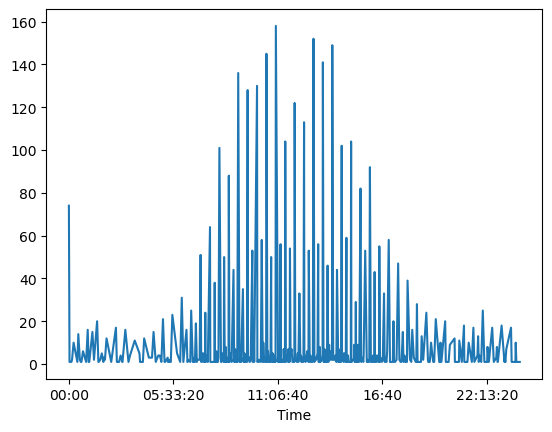

In [18]:
df["Time"].value_counts().plot()

In [19]:
keywords = ['HEAD', 'FINGER', 'LEG', 'BACK', 'BRAIN', 'NECK', 'CARDIAC ARREST', 'HEART','AMPUTATED',
            'UNCONSCIOUSNESS','FAINTED','AMPUTATION','HEAT','ASPHYXIATED','NAIL','SKULL',
            'TRAFFIC ACCIDENT','RIB','ELECTROCUTED','COLLAPSE','TORSO','SHOULDER','FOOT','SLIPS','ELECTRIC SHOCK',
            'CHEMICAL','ARM','SLIP','ALLERGIC REACTION','HAND'
           ,'STRUCK BY','BURN','HIP','PINNED','SAW','DROWN','POWERED INDUSTRIAL VEHICLE','EQUIPMENT FAILURE','KNEE','EYE','THUMB','PELVIS']

# Function to add the keyword if 'NA', otherwise keep the existing value
def add_keyword(row):
    if row['new'] == 'NA':
        for keyword in keywords:
            if keyword in row['Event Keywords']:
                return keyword
    return row['new']

# Apply the function to create or update the "new" column
df['new'] = df.apply(add_keyword, axis=1)

# Now, the 'new' column will be updated with keywords from "Event Description" only if it was 'NA' initially, otherwise it will keep the existing non-'NA' values.
print(df)

      summary_nr Event Date  \
0      220982664 2017-08-10   
1      220973937 2017-07-17   
2      220967632 2017-06-30   
3      220969901 2017-06-30   
4      220977748 2017-06-23   
...          ...        ...   
4842   220778856 2015-07-01   
4843   220778096 2015-07-01   
4844   220778112 2015-07-01   
4845   220777940 2015-07-01   
4846   220778195 2015-07-01   

                                          Abstract Text  \
0     At 9:00 a.m. on August 10, 2017, an employee w...   
1     At 9:45 a.m. on July 17, 2017, an employee was...   
2     At 7:30 a.m. on June 30, 2017, an employee was...   
3     At 2:00 p.m. on June 30, 2017, an employee was...   
4     At 12:20 p.m. on June 23, 2017, an employee wa...   
...                                                 ...   
4842  At approximately 9:15 a.m. on July 1, 2015, Em...   
4843  At approximately 8:30 a.m. on July 1, 2015, Em...   
4844  At 3:00 p.m. on July 1, 2015, an employee was ...   
4845  At approximately 2:30 p.m. on J

In [20]:
df["new"].str.count('NA').sum()

823

In [21]:
df["new"].str.count('HEAD').sum()

545

In [22]:
df["new"].str.count('SAW').sum()

36

In [23]:
df["new"].str.count('FINGER').sum()

519

In [24]:
df["new"].str.count('DIES').sum()

0

In [25]:
df["new"].str.count('BRAIN').sum()


17

In [26]:
df['Event Description'].iloc[95]

'EMPLOYEE DRIVING A DELIVERY TRUCK AND STRIKES ON-COMING TRUC'

In [27]:
df['Event Keywords'].iloc[95]

'TRAFFIC ACCIDENT,DELIVERY WORK,HIGHWAY'

In [28]:
df["new"].str.count('ASPHYXIATED').sum()

112

In [29]:
df["new"].str.count('DIES').sum()

0

In [30]:
df["new"].str.count('FALL').sum()

0

In [31]:
keywords = ['HEAD','BRAIN', 'NECK','FAINTED','SKULL']
def add_keyword(text):
    for keyword in keywords:
        if keyword in text:
            return "head_neck"
    return 'NA'
    
df["head_neck"]=df["new"].apply(add_keyword)

In [32]:
keywords = ['HEAD','BRAIN', 'NECK','FAINTED','SKULL','EYE']
def add_keyword(text):
    for keyword in keywords:
        if keyword in text:
            return "head_neck"
    return 'NA'
    
df["head_neck"]=df["new"].apply(add_keyword)

In [33]:
df["head_neck"].str.count("head_neck").sum()

647

In [34]:
keywords = ['BACK','RIB','TORSO','SHOULDER','HIP','PELVIS']
def add_keyword(row):
    if row['head_neck'] == 'NA':
        for keyword in keywords:
            if keyword in row['new']:
                return "back"
    return row['head_neck']

# Apply the function to create or update the "new" column
df['head_neck'] = df.apply(add_keyword, axis=1)



In [35]:
df["head_neck"].str.count("back").sum()

285

In [36]:
keywords = ['FINGER','NAIL','HAND','AMPUTATION','AMPUTATED','ARM','THUMB','SAW','FiNGERS']
def add_keyword(row):
    if row['head_neck'] == 'NA':
        for keyword in keywords:
            if keyword in row['new']:
                return "upper_limb"
    return row['head_neck']

# Apply the function to create or update the "new" column
df['head_neck'] = df.apply(add_keyword, axis=1)


In [37]:
df["head_neck"].str.count("upper_limb").sum()

923

In [38]:
keywords = ['FOOT','KNEE','SLIPS','LEG','SLIP','STRUCK BY','KNEE']
def add_keyword(row):
    if row['head_neck'] == 'NA':
        for keyword in keywords:
            if keyword in row['new']:
                return "lower_limb"
    return row['head_neck']

# Apply the function to create or update the "new" column
df['head_neck'] = df.apply(add_keyword, axis=1)

In [39]:
df["head_neck"].str.count("lower_limb").sum()

1058

<Axes: xlabel='head_neck'>

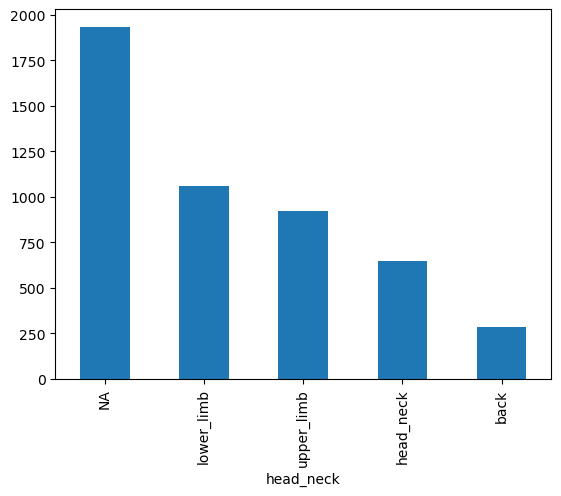

In [40]:
df["head_neck"].value_counts().plot(kind="bar")

In [41]:
df[df["head_neck"]=="NA"]

,summary_nr,Event Date,Abstract Text,Event Description,Event Keywords,con_end,Construction End Use,build_stor,Building Stories,proj_cost,...,task_assigned,Task Assigned,hazsub,fat_cause,fall_ht,Time,new,day_of_week,Day_of_Week,head_neck
5,220974562,2017-06-22,"At 9:07 a.m. on June 22, 2017, an employee was...",EMPLOYEE FAINTS WHILE SORTING CROP IN AIR-COND...,"UNCONSCIOUSNESS,FAINTED,HEAT EXHAUSTION,HEAT",0,,0,,0,...,2,Not Regularly Assigned,0,0,0,09:07:00,UNCONSCIOUSNESS,3,Thursday,NA
9,220959738,2017-05-31,"At 4:45 p.m. on May 31, 2017, an employee set ...",EMPLOYEE FALLS FOURTEEN STORIES FROM SCAFFOLD ...,"ELEVATED WORK PLATFORM,FALL,SCAFFOLD",0,,0,,0,...,1,Regularly Assigned,0,0,0,16:45:00,NA,2,Wednesday,NA
13,220960082,2017-05-30,"At 12:30 p.m. on May 30, 2017, an employee was...",EMPLOYEE FALLS FROM ELEVATION AND IS KILLED,"FALL,FALL PROTECTION",G,Sewer/water treatment plant,2,2,E,...,1,Regularly Assigned,0,18,0,12:30:00,NA,1,Tuesday,NA
14,220968341,2017-05-30,"On May 30, 2017, an employee came to work on S...",EMPLOYEE IS KILLED BY CHEMICAL EXPOSURE TO CHL...,"CARDIAC ARREST,CHLORINE,CHEMICAL VAPOR",0,,0,,0,...,1,Regularly Assigned,0,0,0,12:30:00,CHEMICAL,1,Tuesday,NA
17,220960041,2017-05-30,"At 6:00 p.m. on May 30, 2017, an employee was ...",EMPLOYEE FOUND UNRESPONSIVE IN FIELD DIES FROM...,"AGRICULTURE,HEAT EXHAUSTION,HEAT",0,,0,,0,...,1,Regularly Assigned,8330,0,0,18:00:00,HEAT,1,Tuesday,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4839,220777866,2015-07-01,"At approximately 12:30 p.m. on July 1, 2015, E...",EMPLOYEE IS CAUGHT AND PINNED IN BETWEEN QUART...,"CRUSHING,STRUCK BY,FALLING OBJECT,MATERIAL HAN...",0,,0,,0,...,2,Not Regularly Assigned,0,0,0,12:30:00,PINNED,2,Wednesday,NA
4840,220813414,2015-07-01,"At 12:20 p.m. on July 1, 2015, an employee was...",EMPLOYEE FALLS THROUGH SKYLIGHT AND IS KILLED,"SKYLIGHT,CONCRETE SLAB,FALL PROTECTION,FALL,ROOF",0,,0,,0,...,1,Regularly Assigned,0,0,0,12:20:00,NA,2,Wednesday,NA
4841,220800379,2015-07-01,"At 11:30 a.m. on July 1, 2015, an employee was...",EMPLOYEE IS ELECTROCUTED WHILE WORKING IN THE ...,"ELECTRICAL,ELECTROCUTED",0,,0,,0,...,1,Regularly Assigned,0,0,0,11:30:00,ELECTROCUTED,2,Wednesday,NA
4842,220778856,2015-07-01,"At approximately 9:15 a.m. on July 1, 2015, Em...","EMPLOYEE FALLS FROM BILLBOARD, SUSTAINS TRAUMA...","FALL,LOST BALANCE,LADDER",0,,0,,0,...,1,Regularly Assigned,0,0,0,09:15:00,NA,2,Wednesday,NA


In [42]:
df["head_neck"].fillna('others',inplace=True)

In [43]:
df["new"].fillna('others',inplace=True)

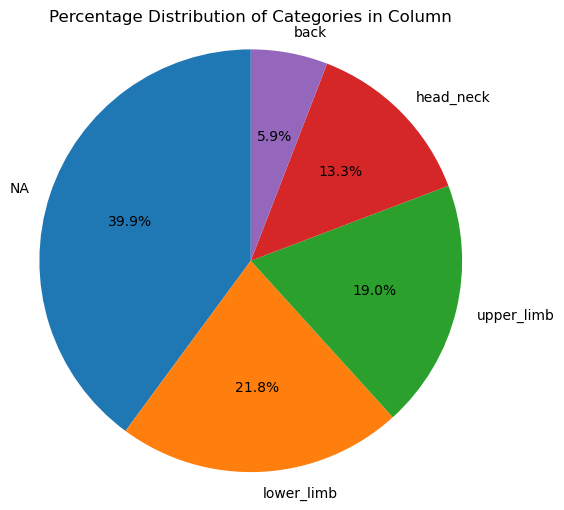

In [44]:


# Calculate the count of each category
value_counts = df['head_neck'].value_counts()

# Extract the counts and labels
counts = value_counts.values
labels = value_counts.index

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.title('Percentage Distribution of Categories in Column')
plt.show()


In [45]:
df.head()

,summary_nr,Event Date,Abstract Text,Event Description,Event Keywords,con_end,Construction End Use,build_stor,Building Stories,proj_cost,...,task_assigned,Task Assigned,hazsub,fat_cause,fall_ht,Time,new,day_of_week,Day_of_Week,head_neck
0,220982664,2017-08-10,"At 9:00 a.m. on August 10, 2017, an employee w...",EMPLOYEE'S FINGERS AMPUTATED WHILE OPERATING A...,"FINGER,MECHANICAL POWER PRESS,AMPUTATION,GUARD",0,,0,,0,...,1,Regularly Assigned,0,0,0,09:00:00,FINGER,3,Thursday,upper_limb
1,220973937,2017-07-17,"At 9:45 a.m. on July 17, 2017, an employee was...",EMPLOYEE'S FINGER IS CAUGHT IN DRILL AND IS AM...,"CAUGHT IN,DRIVE SHAFT,RESIDENTIAL CONSTRUCTION...",H,Other building,1,1,0,...,1,Regularly Assigned,0,0,0,09:45:00,FINGER,0,Monday,upper_limb
2,220967632,2017-06-30,"At 7:30 a.m. on June 30, 2017, an employee was...",EMPLOYEE IS HOSPITALIZED AFTER BEING INJURED I...,"AMPUTATED,EXPLOSION,FIREWORKS",0,,0,,0,...,2,Not Regularly Assigned,0,0,0,07:30:00,AMPUTATED,4,Friday,upper_limb
3,220969901,2017-06-30,"At 2:00 p.m. on June 30, 2017, an employee was...",EMPLOYEE FALLS FROM ROOF AND IS INJURED,"RIB,ROOF,HEAD,FALL PROTECTION,FALL,COLLARBONE,...",C,Commercial building,1,1,D,...,1,Regularly Assigned,0,15,0,14:00:00,HEAD,4,Friday,head_neck
4,220977748,2017-06-23,"At 12:20 p.m. on June 23, 2017, an employee wa...",EMPLOYEE IS STRUCK BY PLYWOOD WHILE UNLOADING ...,"STRUCK BY,TRUCK,BRAIN,NECK,FRACTURE,UNSTABLE LOAD",0,,0,,0,...,1,Regularly Assigned,0,0,0,12:20:00,STRUCK BY,4,Friday,lower_limb


In [46]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
np.random.seed(42)

In [47]:
column_to_drop=["head_neck","new","summary_nr",
                "Event Description","con_end","Building Stories","Project Cost","proj_cost","proj_type",
                "Construction End Use","Event Keywords",
                "Event type","Task Assigned","Degree of Injury","build_stor","Part of Body",
                "nature_of_inj","part_of_body","event_type","hazsub","fat_cause","fall_ht","day_of_week","Event Date"]

In [48]:
X=df.drop(column_to_drop, axis=1)
X

,Abstract Text,Project Type,Nature of Injury,evn_factor,Environmental Factor,hum_factor,Human Factor,task_assigned,Time,Day_of_Week
0,"At 9:00 a.m. on August 10, 2017, an employee w...",,"Amputation, Crushing",2,Catch Point/Puncture Action,14,Other,1,09:00:00,Thursday
1,"At 9:45 a.m. on July 17, 2017, an employee was...",Alteration or rehabilitation,Dislocation,18,Other,10,Position Inappropriate For Task,1,09:45:00,Monday
2,"At 7:30 a.m. on June 30, 2017, an employee was...",,Fire Burn,18,Other,4,Malfunction In Securing/Warning Op,2,07:30:00,Friday
3,"At 2:00 p.m. on June 30, 2017, an employee was...",Alteration or rehabilitation,Serious Fall/Strike,13,Work-Surface/Facility-Layout Condition,14,Other,1,14:00:00,Friday
4,"At 12:20 p.m. on June 23, 2017, an employee wa...",,"Bruising, Contusion",6,Overhead Moving/Falling Object Action,15,Insufficient/Lack/Housekeeping Program,1,12:20:00,Friday
...,...,...,...,...,...,...,...,...,...,...
4842,"At approximately 9:15 a.m. on July 1, 2015, Em...",,Head Trauma,18,Other,8,Perception Malfunction Task-Environment,1,09:15:00,Wednesday
4843,"At approximately 8:30 a.m. on July 1, 2015, Em...",,Serious Fall/Strike,13,Work-Surface/Facility-Layout Condition,6,Equipment Inappropriate For Operation,2,08:30:00,Wednesday
4844,"At 3:00 p.m. on July 1, 2015, an employee was ...",,Serious Fall/Strike,18,Other,14,Other,1,15:00:00,Wednesday
4845,"At approximately 2:30 p.m. on July 1, 2015, Em...",,Serious Fall/Strike,13,Work-Surface/Facility-Layout Condition,1,"Misjudgment, Hazardous Situation",1,14:30:00,Wednesday


In [49]:
y=df.iloc[:,-6].values
y


array([0, 0, 0, ..., 0, 0, 0])

In [50]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=[
                      "Nature of Injury","Environmental Factor","Human Factor","evn_factor","hum_factor","task_assigned","Project Type","Abstract Text","Time","Day_of_Week","Time"]
one_hot=OneHotEncoder(sparse_output=False)
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_X=transformer.fit_transform(X)
transformed_X

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Create a sample DataFrame

# Extract the column you want to label encode as a Series
column_to_encode = df['head_neck']

# Create a LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data using LabelEncoder
encoded_data = label_encoder.fit_transform(column_to_encode)

# Add the encoded data back to the DataFrame
df['Category_encoded'] = encoded_data

# The resulting DataFrame will have a new column with label-encoded values

In [52]:
transformed_y=df['Category_encoded']
transformed_y

0       4
1       4
2       4
3       2
4       3
       ..
4842    0
4843    2
4844    0
4845    3
4846    3
Name: Category_encoded, Length: 4847, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(transformed_X,transformed_y,test_size=0.2)

In [54]:
from sklearn.ensemble import RandomForestClassifier  # Import the model you want to use

# Create the model
model = RandomForestClassifier()  # Example model (you should choose the appropriate model for your task)

# Fit the model on the training data
model.fit(X_train, y_train)

RandomForestClassifier()

In [55]:
type(X_train)

numpy.ndarray

In [56]:
type(y_train)

pandas.core.series.Series

In [57]:
model.score(X_test,y_test)

0.5793814432989691

In [58]:
model.score(X_train,y_train)

1.0

<Axes: xlabel='Part of Body'>

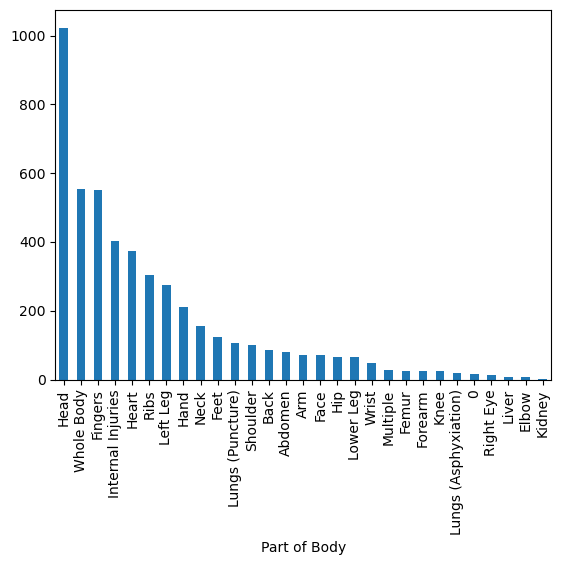

In [59]:
df['Part of Body'].value_counts().plot(kind="bar")

In [60]:
keywords = ['Head', 'Neck','Face','Right Eye']
def add_keyword(text):
    text=str(text)
    for keyword in keywords:
        if keyword in text:
            return "head_neck"
    return 'NA'
    
df["new2"]=df["Part of Body"].apply(add_keyword)

In [61]:
keywords = ['Fingers','Hand','Arm','Wrist','Forearm','Elbow']
def add_keyword(row):
    if row['new2'] == 'NA':
        for keyword in keywords:
            if keyword in str(row['Part of Body']):
                return "upper_limbs"
    return row['new2']

# Apply the function to create or update the "new" column
df['new2'] = df.apply(add_keyword, axis=1)

In [62]:
keywords = ['Whole Body','Internal Injuries','Heart','Ribs','Lungs (Puncture)','Abdomen','Multiple','Lungs (Asphyxiation)','0','Liver','Kidney']
def add_keyword(row):
    if row['new2'] == 'NA':
        for keyword in keywords:
            if keyword in str(row['Part of Body']):
                return "body"
    return row['new2']

# Apply the function to create or update the "new" column
df['new2'] = df.apply(add_keyword, axis=1)

In [63]:
keywords = ['Feet','Lower Leg','Knee','Left Leg','Hip','Femur']
def add_keyword(row):
    if row['new2'] == 'NA':
        for keyword in keywords:
            if keyword in str(row['Part of Body']):
                return "lower_limbs"
    return row['new2']

# Apply the function to create or update the "new" column
df['new2'] = df.apply(add_keyword, axis=1)

In [64]:
keywords = ["Back","Shoulder"]
def add_keyword(row):
    if row['new2'] == 'NA':
        for keyword in keywords:
            if keyword in str(row['Part of Body']):
                return "back"
    return row['new2']

# Apply the function to create or update the "new" column
df['new2'] = df.apply(add_keyword, axis=1)

In [65]:
df.new2.value_counts()

new2
body           1897
head_neck      1265
upper_limbs     913
lower_limbs     581
back            189
NA                2
Name: count, dtype: int64

In [66]:
df1 = df[df['new2'] != 'NA']

In [67]:
df1

,summary_nr,Event Date,Abstract Text,Event Description,Event Keywords,con_end,Construction End Use,build_stor,Building Stories,proj_cost,...,hazsub,fat_cause,fall_ht,Time,new,day_of_week,Day_of_Week,head_neck,Category_encoded,new2
0,220982664,2017-08-10,"At 9:00 a.m. on August 10, 2017, an employee w...",EMPLOYEE'S FINGERS AMPUTATED WHILE OPERATING A...,"FINGER,MECHANICAL POWER PRESS,AMPUTATION,GUARD",0,,0,,0,...,0,0,0,09:00:00,FINGER,3,Thursday,upper_limb,4,upper_limbs
1,220973937,2017-07-17,"At 9:45 a.m. on July 17, 2017, an employee was...",EMPLOYEE'S FINGER IS CAUGHT IN DRILL AND IS AM...,"CAUGHT IN,DRIVE SHAFT,RESIDENTIAL CONSTRUCTION...",H,Other building,1,1,0,...,0,0,0,09:45:00,FINGER,0,Monday,upper_limb,4,upper_limbs
2,220967632,2017-06-30,"At 7:30 a.m. on June 30, 2017, an employee was...",EMPLOYEE IS HOSPITALIZED AFTER BEING INJURED I...,"AMPUTATED,EXPLOSION,FIREWORKS",0,,0,,0,...,0,0,0,07:30:00,AMPUTATED,4,Friday,upper_limb,4,upper_limbs
3,220969901,2017-06-30,"At 2:00 p.m. on June 30, 2017, an employee was...",EMPLOYEE FALLS FROM ROOF AND IS INJURED,"RIB,ROOF,HEAD,FALL PROTECTION,FALL,COLLARBONE,...",C,Commercial building,1,1,D,...,0,15,0,14:00:00,HEAD,4,Friday,head_neck,2,head_neck
4,220977748,2017-06-23,"At 12:20 p.m. on June 23, 2017, an employee wa...",EMPLOYEE IS STRUCK BY PLYWOOD WHILE UNLOADING ...,"STRUCK BY,TRUCK,BRAIN,NECK,FRACTURE,UNSTABLE LOAD",0,,0,,0,...,0,0,0,12:20:00,STRUCK BY,4,Friday,lower_limb,3,head_neck
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4842,220778856,2015-07-01,"At approximately 9:15 a.m. on July 1, 2015, Em...","EMPLOYEE FALLS FROM BILLBOARD, SUSTAINS TRAUMA...","FALL,LOST BALANCE,LADDER",0,,0,,0,...,0,0,0,09:15:00,NA,2,Wednesday,NA,0,body
4843,220778096,2015-07-01,"At approximately 8:30 a.m. on July 1, 2015, Em...","EMPLOYEE FALLS FROM ELEVATION, SUSTAINS HEAD T...","FALL,LOST BALANCE,HEAD",0,,0,,0,...,0,0,0,08:30:00,HEAD,2,Wednesday,head_neck,2,head_neck
4844,220778112,2015-07-01,"At 3:00 p.m. on July 1, 2015, an employee was ...",EMPLOYEE FOUND UNRESPONSIVE BY HOME OWNER DURI...,UNCONSCIOUSNESS,0,,0,,0,...,0,0,0,15:00:00,UNCONSCIOUSNESS,2,Wednesday,NA,0,body
4845,220777940,2015-07-01,"At approximately 2:30 p.m. on July 1, 2015, Em...",EMPLOYEE IS STRUCK AND KILLED BY LOGGING TRUCK...,"STRUCK BY,MOTOR VEHICLE",0,,0,,0,...,0,0,0,14:30:00,STRUCK BY,2,Wednesday,lower_limb,3,body


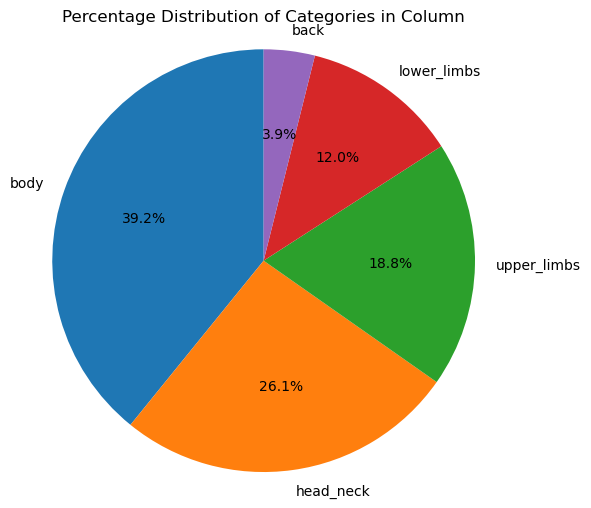

In [68]:
value_counts = df1['new2'].value_counts()

# Extract the counts and labels
counts = value_counts.values
labels = value_counts.index

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.title('Percentage Distribution of Categories in Column')
plt.show()

In [69]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
np.random.seed(42)

In [70]:
column_to_drop=["Abstract Text","head_neck","new","summary_nr",
                "Event Description","con_end","Building Stories","Project Cost","proj_cost","proj_type",
                "Construction End Use","Event Keywords",
                "Task Assigned","build_stor","day_of_week",
                "nature_of_inj","part_of_body","event_type","hazsub","fat_cause","fall_ht","new2","Part of Body","Project Type","evn_factor","hum_factor","Category_encoded","Event Date"]

In [71]:
X=df1.drop(column_to_drop, axis=1)
X

,Degree of Injury,Nature of Injury,Event type,Environmental Factor,Human Factor,task_assigned,Time,Day_of_Week
0,Nonfatal,"Amputation, Crushing",Caught in or between,Catch Point/Puncture Action,Other,1,09:00:00,Thursday
1,Nonfatal,Dislocation,Caught in or between,Other,Position Inappropriate For Task,1,09:45:00,Monday
2,Nonfatal,Fire Burn,Other,Other,Malfunction In Securing/Warning Op,2,07:30:00,Friday
3,Fatal,Serious Fall/Strike,Fall (from elevation),Work-Surface/Facility-Layout Condition,Other,1,14:00:00,Friday
4,Nonfatal,"Bruising, Contusion",Struck-by,Overhead Moving/Falling Object Action,Insufficient/Lack/Housekeeping Program,1,12:20:00,Friday
...,...,...,...,...,...,...,...,...
4842,Fatal,Head Trauma,Fall (from elevation),Other,Perception Malfunction Task-Environment,1,09:15:00,Wednesday
4843,Fatal,Serious Fall/Strike,Fall (from elevation),Work-Surface/Facility-Layout Condition,Equipment Inappropriate For Operation,2,08:30:00,Wednesday
4844,Fatal,Serious Fall/Strike,Other,Other,Other,1,15:00:00,Wednesday
4845,Fatal,Serious Fall/Strike,Struck-by,Work-Surface/Facility-Layout Condition,"Misjudgment, Hazardous Situation",1,14:30:00,Wednesday


In [72]:
y=df1.iloc[:,-6]

In [73]:
y

0                FINGER
1                FINGER
2             AMPUTATED
3                  HEAD
4             STRUCK BY
             ...       
4842                 NA
4843               HEAD
4844    UNCONSCIOUSNESS
4845          STRUCK BY
4846          STRUCK BY
Name: new, Length: 4845, dtype: object

In [74]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=[
                      "Nature of Injury","Environmental Factor","Event type","Human Factor","task_assigned","Degree of Injury","Day_of_Week","Time"]
one_hot=OneHotEncoder(sparse_output=False)
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_X=transformer.fit_transform(X)
transformed_X

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [75]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Create a sample DataFrame

# Extract the column you want to label encode as a Series
column_to_encode = df1['new2']

# Create a LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data using LabelEncoder
encoded_data = label_encoder.fit_transform(column_to_encode)

# Add the encoded data back to the DataFrame
df1.iloc[:,-6] = encoded_data

# The resulting DataFrame will have a new column with label-encoded values

In [76]:
transformed_y=df1['Category_encoded']
transformed_y

0       4
1       4
2       4
3       2
4       3
       ..
4842    0
4843    2
4844    0
4845    3
4846    3
Name: Category_encoded, Length: 4845, dtype: int64

In [77]:
from sklearn.model_selection import train_test_split
np.random.seed(150)
X_train,X_test,y_train,y_test=train_test_split(transformed_X,transformed_y,test_size=0.2)

In [78]:
from sklearn.ensemble import RandomForestClassifier  # Import the model you want to use

# Create the model
model1 = RandomForestClassifier(n_estimators=1000)  # Example model (you should choose the appropriate model for your task)

# Fit the model on the training data
model1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [79]:
model1.score(X_train,y_train)

0.9966460268317854

In [80]:
model1.score(X_test,y_test)

0.6831785345717234

In [97]:
import xgboost as xgb


In [98]:
model2 = xgb.XGBClassifier(learning_rate=0.001)  

model2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [99]:
model2.score(X_test,y_test)

0.6831785345717234

In [100]:
model2.score(X_train,y_train)

0.6836945304437565

In [101]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(model1,transformed_X,transformed_y,cv=10))



0.6437645906108885

In [102]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(model2,transformed_X,transformed_y,cv=10))

0.6600583624435545

In [103]:
y_predicted = model1.predict(transformed_X)

In [104]:
from sklearn.metrics import precision_score

# Your true labels and predicted labels

# Calculate precision for each class
precision = precision_score(transformed_y, y_predicted, average=None)

# Micro-Averaging
micro_precision = precision_score(transformed_y, y_predicted, average='micro')

# Macro-Averaging
macro_precision = precision_score(transformed_y, y_predicted, average='macro')

# Weighted-Averaging
weighted_precision = precision_score(transformed_y, y_predicted, average='weighted')

print("Precision for each class:", precision)
print("Micro Precision:", micro_precision)
print("Macro Precision:", macro_precision)
print("Weighted Precision:", weighted_precision)
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

# Your true labels and predicted labels
true_labels = transformed_y
predicted_labels = y_predicted

precision = precision_score(true_labels, predicted_labels, average='weighted')  # or average='ovr'
recall = recall_score(true_labels, predicted_labels, average='weighted')  # or average='ovr'
f1 = f1_score(true_labels, predicted_labels, average='weighted')




Precision for each class: [0.92223873 0.9254902  0.93986254 0.91567369 0.98106904]
Micro Precision: 0.9339525283797729
Macro Precision: 0.9368668414508857
Weighted Precision: 0.9345567067457208


In [105]:
print("recall",recall)
print("f1",f1)


recall 0.9339525283797729
f1 0.9335114057723276


In [106]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(transformed_y,y_predicted)
print(accuracy)

0.9339525283797729


In [107]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(model2,transformed_X,transformed_y,cv=10))
y_predicted = model2.predict(transformed_X)

In [108]:
from sklearn.metrics import precision_score

# Your true labels and predicted labels

# Calculate precision for each class
precision = precision_score(transformed_y, y_predicted, average=None)

# Micro-Averaging
micro_precision = precision_score(transformed_y, y_predicted, average='micro')

# Macro-Averaging
macro_precision = precision_score(transformed_y, y_predicted, average='macro')

# Weighted-Averaging
weighted_precision = precision_score(transformed_y, y_predicted, average='weighted')

print("Precision for each class:", precision)
print("Micro Precision:", micro_precision)
print("Macro Precision:", macro_precision)
print("Weighted Precision:", weighted_precision)
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

# Your true labels and predicted labels
true_labels = transformed_y
predicted_labels = y_predicted

precision = precision_score(true_labels, predicted_labels, average='weighted')  # or average='ovr'
recall = recall_score(true_labels, predicted_labels, average='weighted')  # or average='ovr'
f1 = f1_score(true_labels, predicted_labels, average='weighted')



Precision for each class: [0.7065073  0.42957746 0.57142857 0.57318841 0.89506953]
Micro Precision: 0.6835913312693499
Macro Precision: 0.635154255673789
Weighted Precision: 0.6790454935316602


In [109]:
print("recall",recall)
print("f1",f1)

recall 0.6835913312693499
f1 0.6649510220485695


In [ ]:
df['Day_of_Week'].value_counts().plot(kind="bar")


In [ ]:
df['Time'].info()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
clf = LogisticRegression()

# Fit the model to the training data
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

In [94]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [95]:
from joblib import load,dump
dump(model2,"lol")

['lol']

In [96]:
loaded = load("/Users/divyabhat/Desktop/sample/lol")



In [97]:
var=[["Nonfatal","Dislocation","Other","Other","Other",2,3,"Thursday"]]


In [98]:
final_input = transformer.transform(input_final)

NameError: name 'input_final' is not defined

In [863]:


# Now, you can use the numeric_data for prediction
predictions = loaded.predict(var)

ValueError: Feature shape mismatch, expected: 112, got 8